In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
from gensim.models import word2vec
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

In [2]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("ramen_vocab")
df = mydataset.get_dataframe()

In [6]:
folder_path = dataiku.Folder("m9JZdV7b").get_path()
model_path = folder_path + "/word2vec_ramen_model.model"
print(model_path)
ramen_model = word2vec.Word2Vec.load(model_path)

/Users/mmiyazaki/dataiku/Design/DATA_DIR/managed_folders/RAMENMEITEN/m9JZdV7b/word2vec_ramen_model.model


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,words
0,0.401153,0.020585,-0.790893,1.158908,-0.266886,-0.732636,0.062897,0.271060,0.004648,-0.260550,-0.504810,-0.291552,0.298632,-1.660470,0.475137,-0.018492,0.121969,0.150705,-0.786482,-0.249712,0.731740,-0.211761,-0.274316,-0.627219,-0.510836,0.165909,-0.132359,-1.214270,0.211759,0.374014,0.091290,-0.213818,0.460527,0.447722,-0.299105,0.129620,0.571267,-1.084399,0.146032,0.221189,0.778038,-0.954740,0.214375,-1.036974,-0.762488,-0.440529,0.349220,-0.816541,0.416893,0.062098,-0.922542,-0.766692,-0.707679,0.060779,-0.567353,0.090408,0.561766,-0.636246,-0.423093,-0.412590,-0.100922,-0.837372,0.619568,0.072080,-0.013041,0.244725,-0.390754,-0.313474,0.147571,-0.177220,0.140061,1.298015,-0.150947,-0.509353,-0.363919,0.208396,-0.373721,0.259271,0.051489,-0.285398,-0.707707,-0.023756,-0.275817,0.742896,-0.139213,0.019814,-1.143944,-1.017247,0.174717,0.015219,0.748590,0.147132,0.659522,-0.000770,-0.533910,-0.808451,0.365780,-0.261738,0.196518,0.269872,0.706972,-0.671623,-0.826196,0.079239,0.567944,-0.588413,0.581498,-0.153441,-0.283237,0.540288,-1.495175,-0.297095,0.738917,0.132119,-0.655843,-1.001364,-0.041217,0.075238,0.095039,0.360706,-0.468286,1.437252,-0.310094,0.270916,0.449151,-0.789232,0.123528,0.540950,0.798433,-0.158538,-0.644661,-0.278431,0.647693,0.579778,-0.543904,-0.625970,0.210934,-0.598574,-1.685352,-0.663430,0.359893,-0.103425,-0.262636,0.026807,0.057759,0.441668,0.666899,0.168778,0.064122,0.112337,0.338075,0.326300,-0.243968,-0.063882,0.021808,-0.040049,-0.504988,-0.065919,0.649494,-0.497610,0.510094,-1.407803,0.142180,0.328617,0.232750,0.083828,-0.076566,0.219057,0.077100,-0.126029,1.119804,0.139634,0.314753,-1.175908,-0.062321,0.913330,-0.152654,0.695563,-0.012932,0.305800,-0.370677,-0.233896,-1.113089,-0.141122,0.360889,-0.350461,0.080743,0.513889,0.237740,-0.847224,-0.210175,0.470617,-0.005578,-0.763901,-0.691849,-0.427064,-0.361900,0.843352,-0.256119,-0.917321,mormor
1,0.430742,0.187884,-0.271987,0.256182,0.467123,0.005327,0.328107,-0.017224,-0.405459,0.043699,-0.403039,-0.288964,0.355923,-0.379464,-0.085401,0.153823,-0.085222,0.410683,0.021487,0.089734,-0.039097,-0.013008,0.062284,0.077316,0.499730,0.257470,0.317715,-0.521514,0.002514,0.023402,-0.203727,-0.068641,0.107770,0.322041,-0.372645,-0.017983,-0.010599,-0.262179,-0.180614,0.174305,-0.500007,0.483767,-0.647639,0.292390,-0.060883,-0.309367,-0.021907,0.165058,0.272335,-0.143662,-0.429368,0.127043,-0.670296,0.405300,0.195407,-0.501201,0.522336,0.073123,-0.043557,-0.152248,0.446297,0.091143,-0.676850,0.435496,0.025823,-0.169933,-0.002943,0.107592,0.248727,0.245407,-0.134807,0.627618,0.222086,-0.120599,0.211376,-0.133631,-0.327864,0.173004,0.076226,-0.134158,-0.151063,-0.306592,0.030618,-0.053583,0.339166,-0.847471,-0.679978,-0.241686,0.108362,-0.353877,-0.473062,0.451436,0.515693,-0.270230,-0.005545,-0.241172,0.332479,-0.176345,0.004196,-0.165562,0.029588,-0.670700,-0.408533,0.303833,0.024497,-0.313273,-0.063772,-0.172834,-0.216321,-0.210421,-0.142386,0.079782,0.192617,-0.162994,-0.606108,0.239781,-0.031497,-0.033329,0.148858,0.458796,0.374047,0.309058,0.337807,-0.119019,0.104880,0.028163,-0.147389,0.258414,0.145807,-0.022922,0.186022,0.470393,0.243154,0.648756,0.049980,0.042831,-0.160028,-0.132787,-0.098447,-0.109722,-0.314129,-0.309859,0.021924,0.446816,-0.095763,0.306002,0.54

In [17]:
vocabs = list(ramen_model.wv.vocab.keys())
X = ramen_model.wv[vocabs]

In [20]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [22]:
df = pd.DataFrame(X_tsne, index=vocabs, columns=['x', 'y'])

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20282 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36771 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36913 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33267 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31558 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23493 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21931 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27832 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33268 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24535 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40441 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24534 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27579 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20031 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30871 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21570 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31911 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28655 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31958 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39442 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23653 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26045 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28953 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35206 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40434 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25074 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20341 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20887 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24062 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27877 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34093 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-p

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12378 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36763 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22633 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30003 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29157 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36794 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39854 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39770 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30331 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37218 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28460 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25903 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 40023 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23554 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38272 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29863 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33510 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22259 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26262 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31806 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24517 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35201 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27573 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21205 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31896 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22679 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36939 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25563 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23481 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26757 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38867 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24433 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38911 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33256 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39993 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26627 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30476 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31505 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32701 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32925 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12427 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12357 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31684 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29579 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24841 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33292 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31777 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35377 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25405 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32330 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37196 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28783 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23041 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22768 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33437 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22290 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34101 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36896 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38706 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23490 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30053 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37101 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22916 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26292 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31036 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20736 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20804 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30011 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37002 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32854 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28171 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28382 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21161 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24974 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33075 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26666 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27508 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20219 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27177 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25514 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24049 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38936 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20663 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32908 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21535 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21104 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35186 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27728 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30041 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36032 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27954 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38666 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25764 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20652 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 40633 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22675 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20035 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24833 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35440 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27036 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24472 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24458 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35582 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34952 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35039 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30928 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21899 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20992 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22696 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26355 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32986 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33469 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32318 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38498 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36767 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20405 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26365 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27431 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22519 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22766 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26071 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21610 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29980 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31069 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25159 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37772 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26517 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23330 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36042 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29378 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36556 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21936 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25333 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24218 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20175 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31903 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33351 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21565 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26575 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38684 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39464 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26623 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mmiyazaki/dataiku/Design/DATA_DIR/code-envs/python/japan-nlp/lib/python3.6/site-packages/

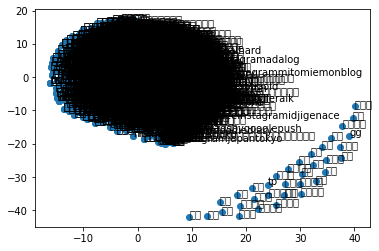

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

In [0]:
df.head()